# CompAIRR results analysis

We ran CompAIRR on the global dataset and we analyze the results in this notebook.

In [33]:
from itertools import combinations
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import NegativeClassOptimization.config as config

In [3]:
compairr_path = Path("../data/CompAIRR")

## Overlaps

Text(0.5, 1.0, 'Allowed sequence-level difference = 2')

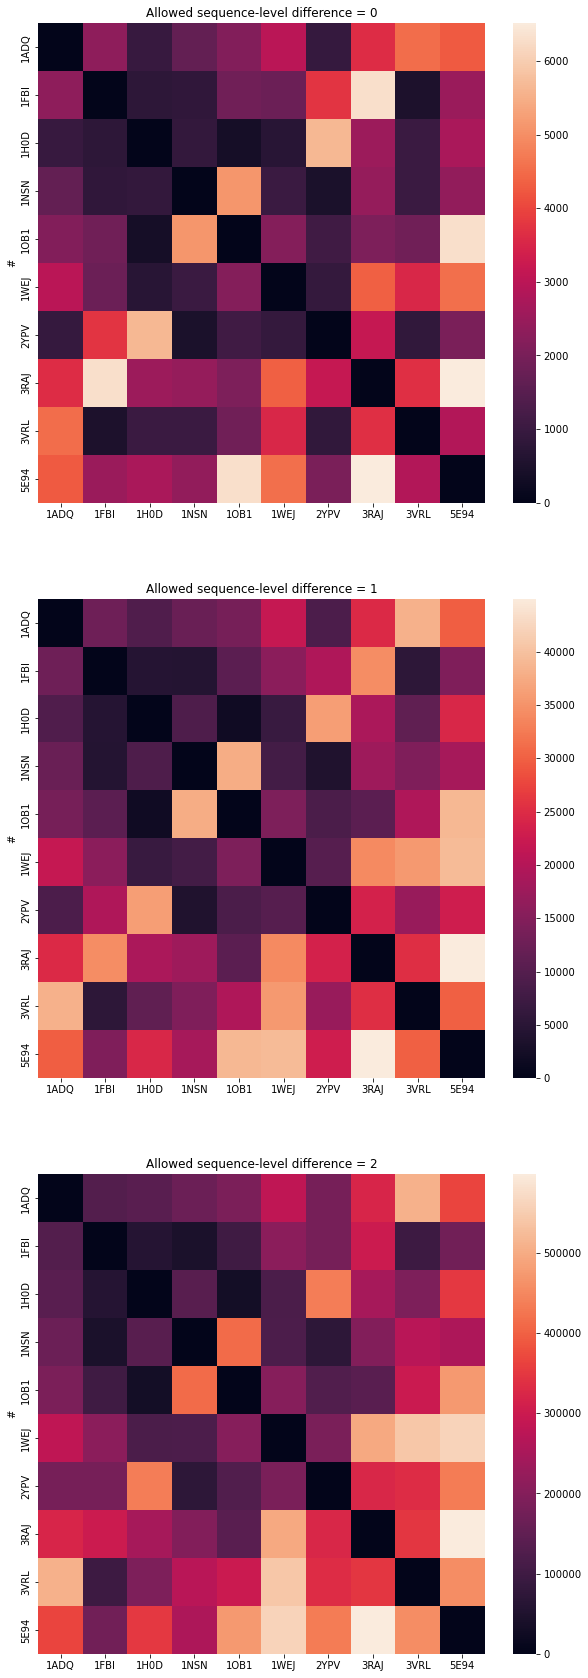

In [30]:
def get_overlaps(
    difference_th: int, 
    compairr_path = compairr_path,
    null_diagonal = True,
    ) -> pd.DataFrame:

    df_overlaps = pd.read_csv(
        compairr_path / f"overlaps_d{difference_th}_output.tsv", 
        sep='\t').set_index("#")
    
    if null_diagonal:
        for i in range(df_overlaps.shape[0]):
            df_overlaps.iloc[i, i] = 0
    
    return df_overlaps

df_overlaps_d0 = get_overlaps(0)
df_overlaps_d1 = get_overlaps(1)
df_overlaps_d2 = get_overlaps(2)

fig, axs = plt.subplots(nrows=3, figsize = (10, 30))
sns.heatmap(df_overlaps_d0, ax=axs[0])
axs[0].set_title("Allowed sequence-level difference = 0")
sns.heatmap(df_overlaps_d1, ax=axs[1])
axs[1].set_title("Allowed sequence-level difference = 1")
sns.heatmap(df_overlaps_d2, ax=axs[2])
axs[2].set_title("Allowed sequence-level difference = 2")

In [47]:
antigens = df_overlaps_d0.columns.to_list()
records = []
for (ag1, ag2) in combinations(antigens, r=2):
    records.append({
        "ag1_ag2": f"{ag1}_{ag2}",
        "d0_overlaps": np.log(df_overlaps_d0.loc[ag1, ag2]),
        "d1_overlaps": np.log(df_overlaps_d1.loc[ag1, ag2]),
        "d2_overlaps": np.log(df_overlaps_d2.loc[ag1, ag2]),
    })
df_pairs = pd.DataFrame.from_records(records)
df_pairs.head(2)

,ag1_ag2,d0_overlaps,d1_overlaps,d2_overlaps
0,1ADQ_1FBI,7.754910,9.457122,11.765938
1,1ADQ_1H0D,6.869014,9.141847,11.842215


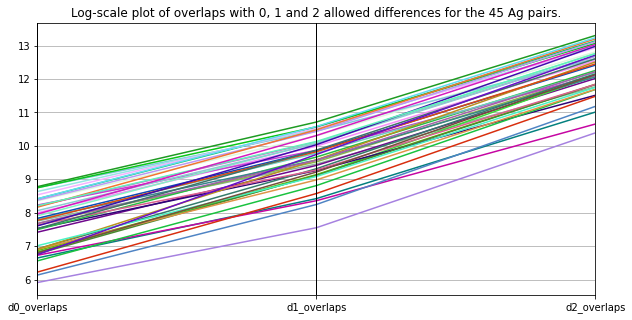

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.plotting.parallel_coordinates(df_pairs, class_column="ag1_ag2", ax=ax)
ax.set_title("Log-scale plot of overlaps with 0, 1 and 2 allowed differences for the 45 Ag pairs.")
ax.get_legend().remove()

It would also be useful to do upsetplots based on d1 and d2 similarities.

## Clustering